## Fetch Data

In [1]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data
headers = ["Sex", "Length", "Diameter", "Height", "Whole_weight", "Shucked_weight",
           "Viscera_weight", "Shell_weight", "Rings"]
data = pd.read_csv('abalone.data.csv', names=headers)
len(data)

4177

In [3]:
# Rings - value + 1.5 gives age in years (eg. 4 = 5.5 years)
data['Age'] = data['Rings'] + 1.5
data = data.drop('Rings', axis = 1)

In [4]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## Exploratory Data Analysis

In [5]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [6]:
# checking if there is any NULL data 
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
dtype: int64

In [7]:
# statistical information about data
data.describe() 

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [8]:
# change the height 0 to mean of the Infants heights
# find mean of Infant Height
mean_infant_height = np.round(np.mean(data[data.Sex == "I"]["Height"]), 3)

# change 0 to mean_infant_height
#data[data.Height == 0]["Height"] = mean_infant_height
#data[data.Height == 0]["Height"].replace(0.0, mean_infant_height, inplace=True)
#data = data.replace(to_replace=data[data.Height == 0]["Height"], value=mean_infant_height, inplace=True)
data.loc[data["Height"] == 0,'Height'] = mean_infant_height

In [9]:
# statistical information about the data for check the min height
data.describe() 

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139568,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041721,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [10]:
# relationship between numerical data
data.loc[:,["Length", "Diameter", "Height", "Whole_weight", "Shucked_weight",
            "Viscera_weight", "Shell_weight", "Age"]].corr() # correlation 

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
Length,1.000000,0.986812,0.828091,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.834265,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.828091,0.834265,1.000000,0.819916,0.775670,0.798951,0.819359,0.557755
Whole_weight,0.925261,0.925452,0.819916,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.775670,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798951,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.819359,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.556720,0.574660,0.557755,0.540390,0.420884,0.503819,0.627574,1.000000


In [11]:
# define a function fot anomaly detection
def anomalyDetection(df, columns):
    outlier_indices = []
    
    for c in columns:
        # first quartile
        Q1 = np.percentile(df[c],25)
        # third quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # multiplier for outlier detection
        outlier_step = IQR * 1.5
        # detect outlier and outlier index
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indexes
        outlier_indices.extend(outlier_list_col)
    
    # find unique outliers
    outlier_indices = Counter(outlier_indices)
    # if a sample (v) is outlier for 1 different column then treat it as outlier (v>1)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
    
    return multiple_outliers

In [12]:
data_anomaly = data.loc[anomalyDetection(data, ["Length", "Diameter", "Height", "Whole_weight", "Shucked_weight",
                                                "Viscera_weight", "Shell_weight"])]
data_anomaly.Sex.value_counts()

I    40
M    30
F    11
Name: Sex, dtype: int64

In [13]:
# create new data for drop anomaly data
datawithNoAnomaly = data
datawithNoAnomaly.shape

(4177, 9)

In [14]:
# drop anomaly data 
for i in data_anomaly.index:
    datawithNoAnomaly.drop(labels=i, inplace=True)

In [15]:
# this data use for see an effect of outliers in full data
# 4177 - 81 = 4096
datawithNoAnomaly.shape

(4096, 9)

## Data Visualization

In [16]:
# function for plot histogram
def plotHistogram(column):
    """
        input: Column name
        output: Histogram plot
    """
    
    plt.figure()
    plt.hist(data[column], bins = 85, color = "orange")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Data Frequency - {column}")
    plt.show()

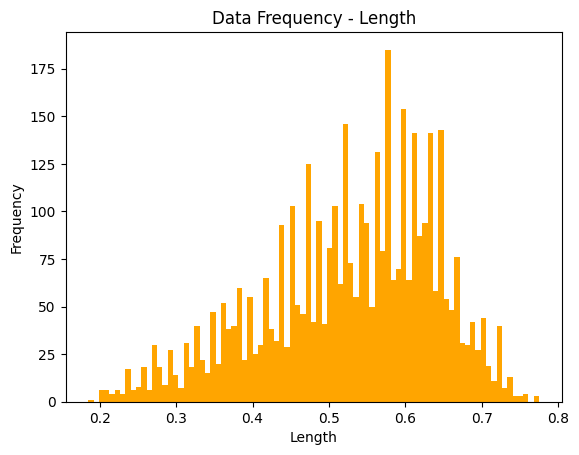

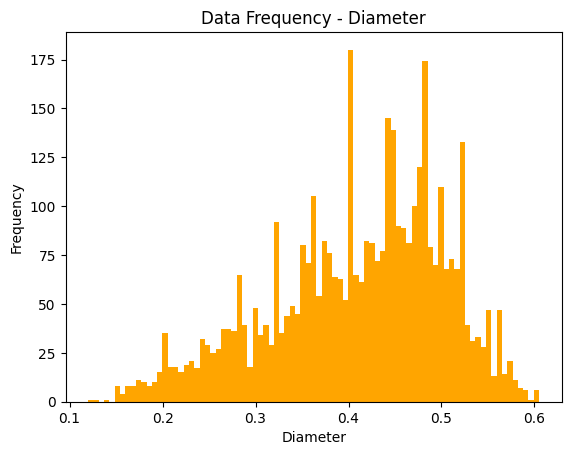

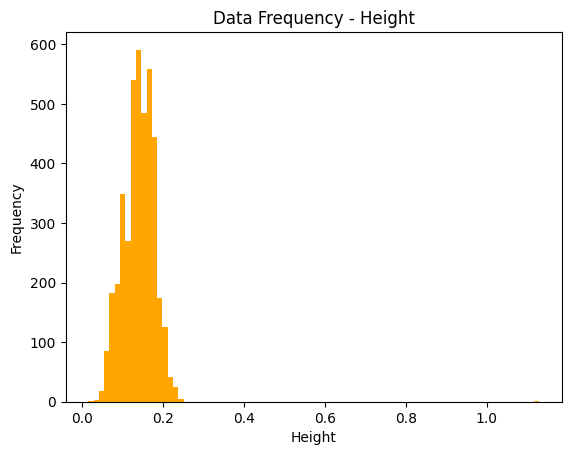

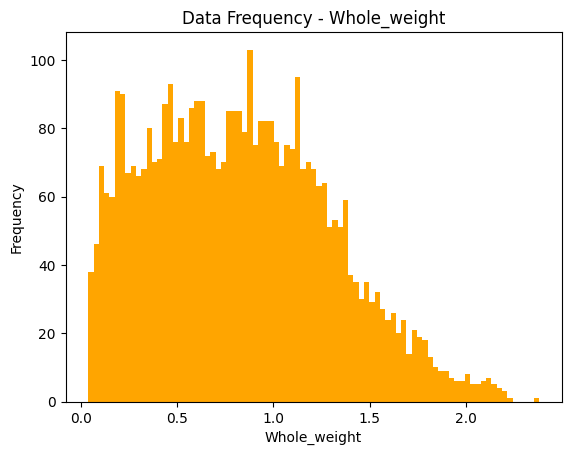

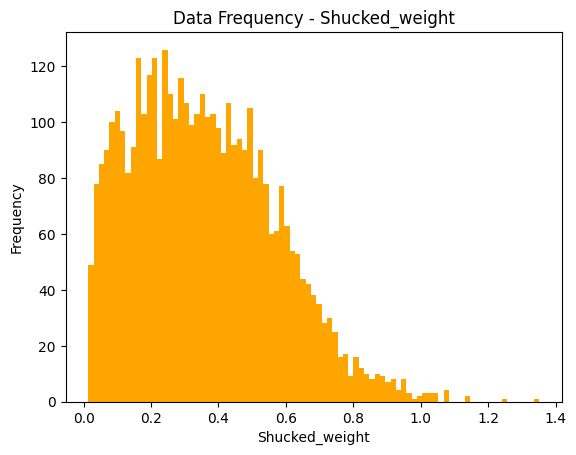

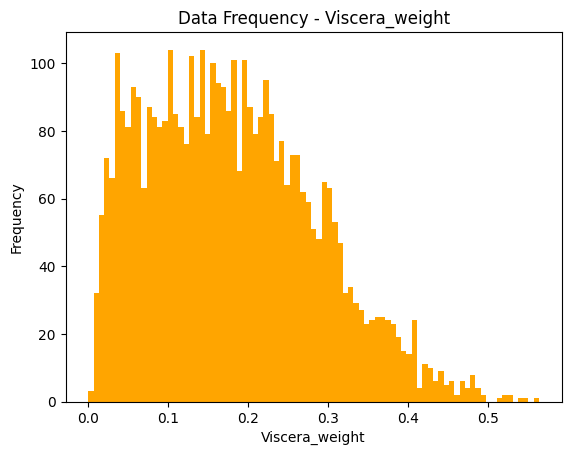

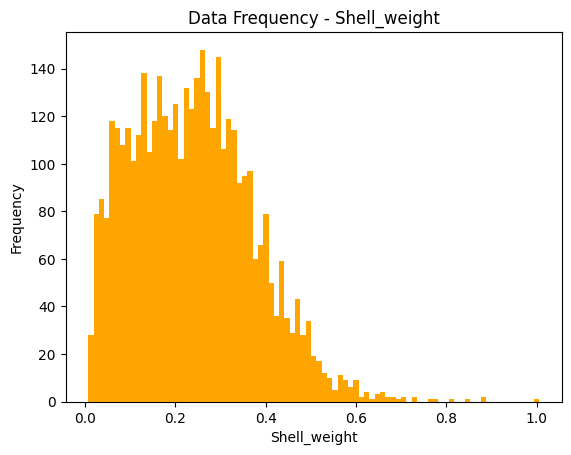

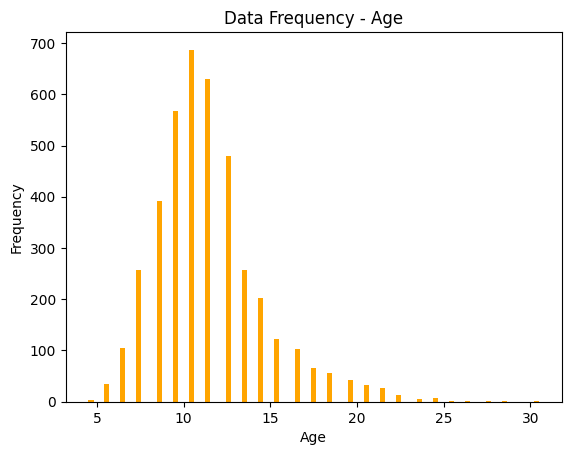

In [17]:
# plot histogram for numerical variables 
column_names = ["Length", "Diameter", "Height", "Whole_weight", "Shucked_weight",
                "Viscera_weight", "Shell_weight", "Age"]
for i in column_names:
    plotHistogram(i)

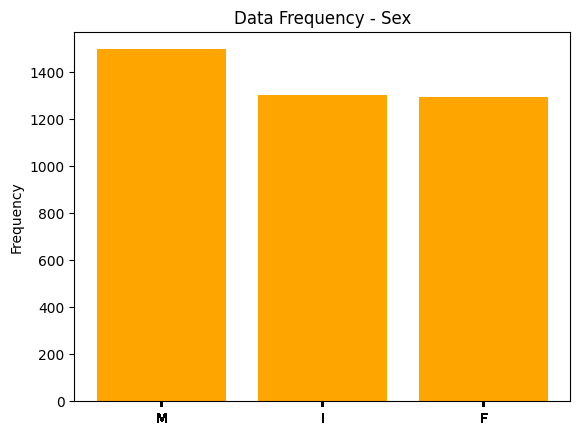

Number of Sex 
M    1498
I    1302
F    1296
Name: Sex, dtype: int64


In [18]:
# Number of Sex 
plt.figure()
plt.bar(data["Sex"].value_counts().index, data["Sex"].value_counts(), color = "orange")
plt.xticks(data["Sex"].values)
plt.ylabel("Frequency")
plt.title(f"Data Frequency - Sex")
plt.show()
print(f"Number of Sex \n{data['Sex'].value_counts()}")

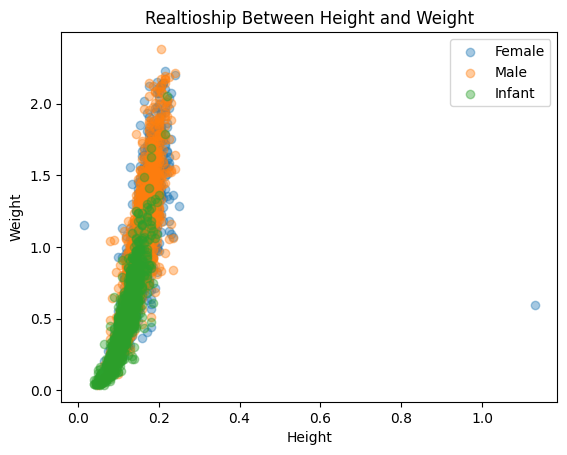

In [19]:
# Height and Weight Comparison by Sex
male = data[data.Sex == "M"]

female = data[data.Sex == "F"]

infant = data[data.Sex == "I"]  

# Height and Weight Comparison by Sex
plt.figure()
plt.scatter(female.Height, female.Whole_weight, alpha = 0.4, label = "Female")
plt.scatter(male.Height, male.Whole_weight, alpha = 0.4, label = "Male")
plt.scatter(infant.Height, infant.Whole_weight, alpha = 0.4, label = "Infant")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Realtioship Between Height and Weight")
plt.legend()
plt.show()

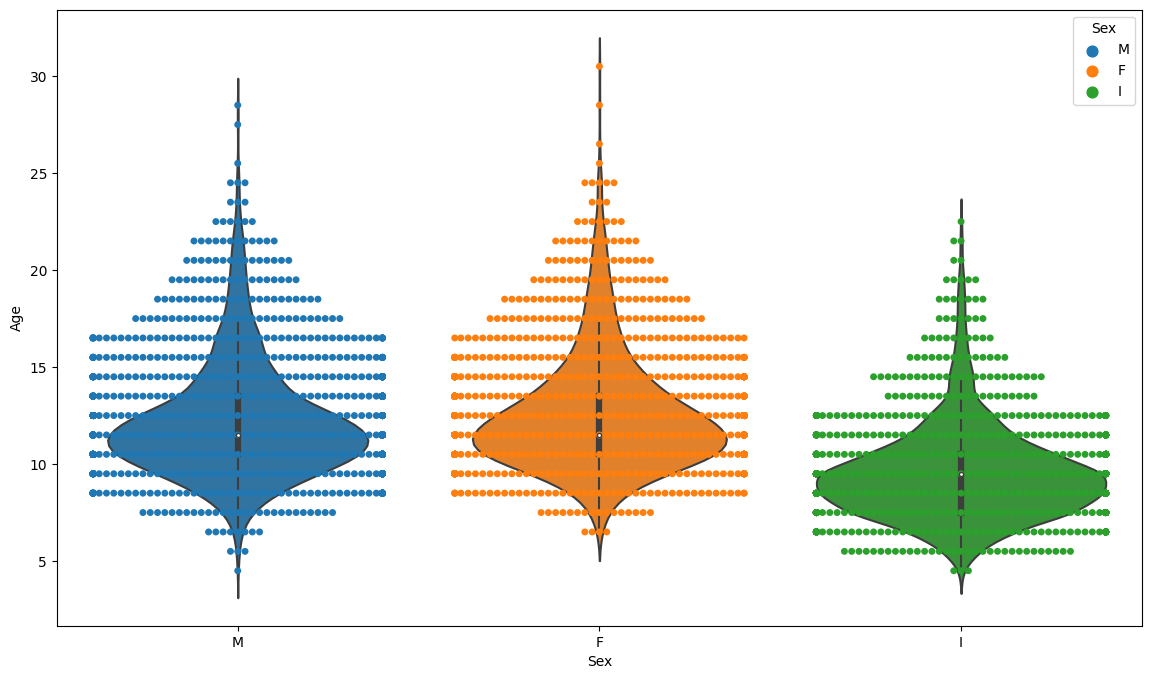

In [20]:
plt.figure(figsize = (14,8))
sns.swarmplot(x = 'Sex', y = 'Age', data = data, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = data)
plt.show()

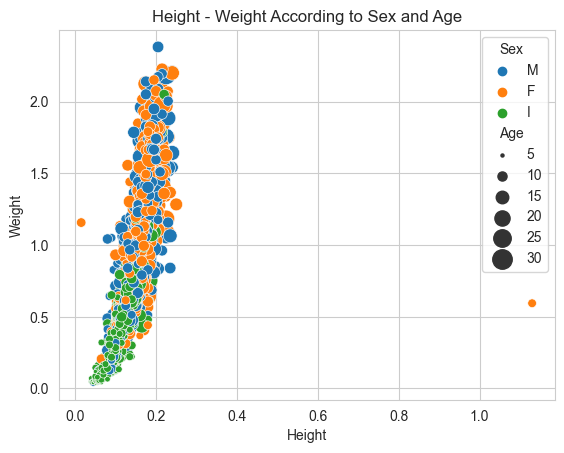

In [21]:
sns.set_style("whitegrid")
sns.scatterplot(x="Height", y="Whole_weight", hue="Sex", size="Age", sizes=(1,200), data=data)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height - Weight According to Sex and Age")
plt.show()

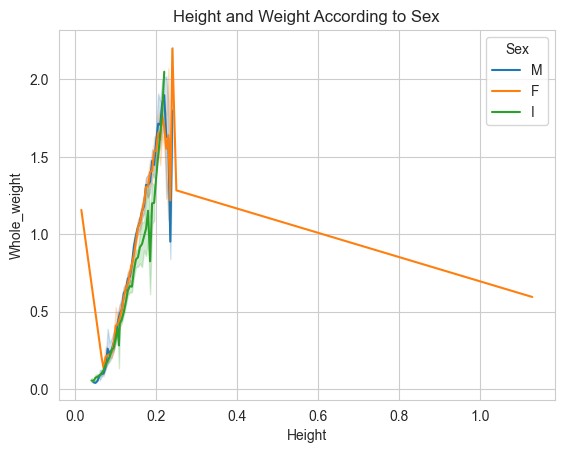

In [22]:
sns.lineplot(x='Height', y='Whole_weight', hue='Sex', data=data)
plt.title('Height and Weight According to Sex')
plt.show()

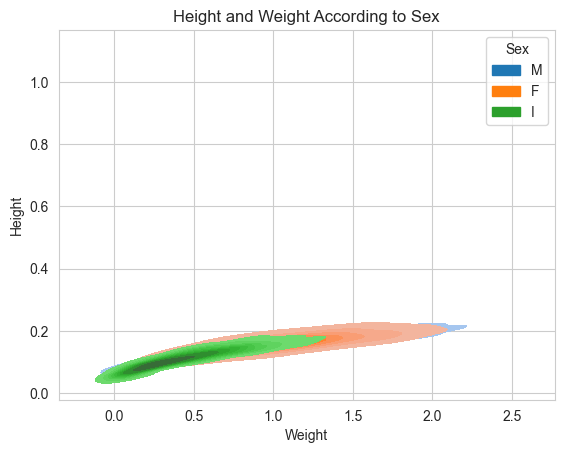

In [23]:
sns.kdeplot(data=data, x="Whole_weight", y="Height", hue="Sex", fill = True)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height and Weight According to Sex")
plt.show()

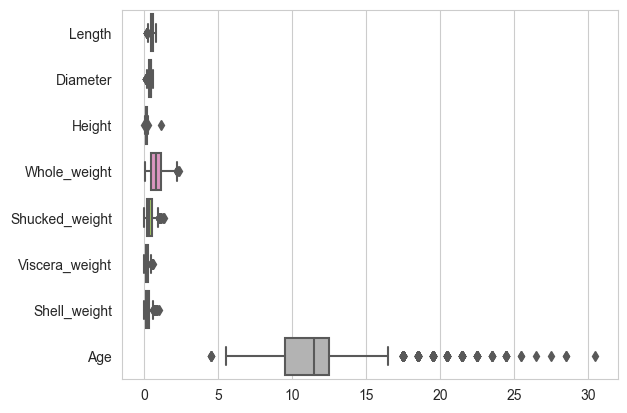

In [24]:
sns.boxplot(data=data.loc[:,["Length", "Diameter", "Height", "Whole_weight", "Shucked_weight",
                             "Viscera_weight", "Shell_weight", "Age"]], orient="h", palette="Set2")
plt.show()

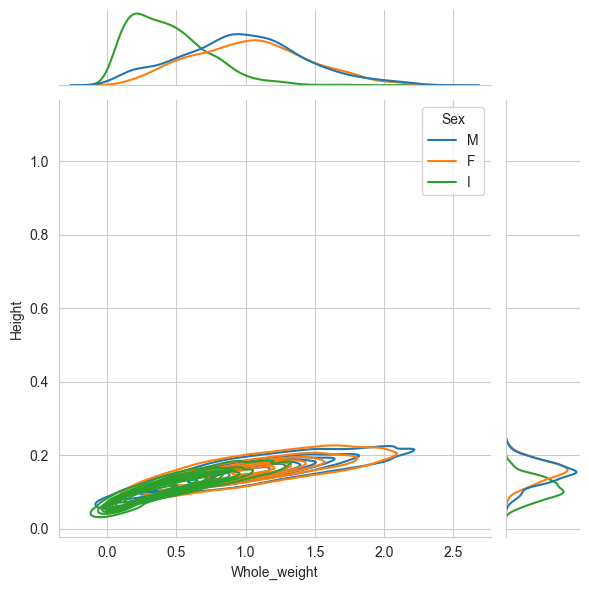

In [25]:
sns.jointplot(
    data=data,
    x="Whole_weight", y="Height", hue="Sex",
    kind="kde")
plt.show()

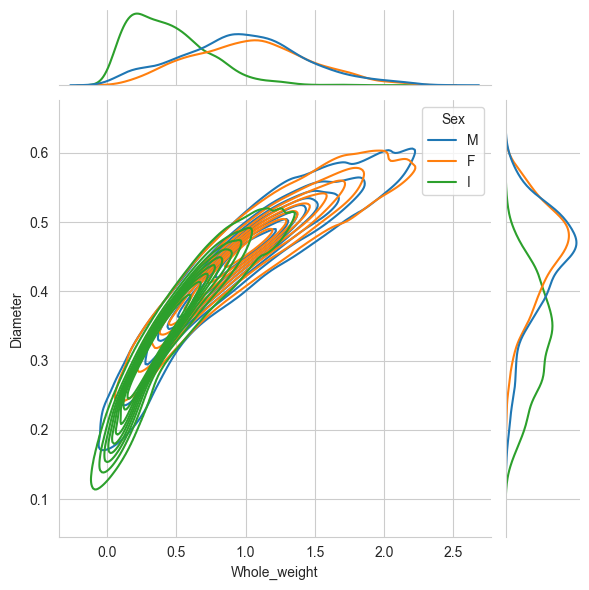

In [26]:
sns.jointplot(
    data=data,
    x="Whole_weight", y="Diameter", hue="Sex",
    kind="kde")
plt.show()

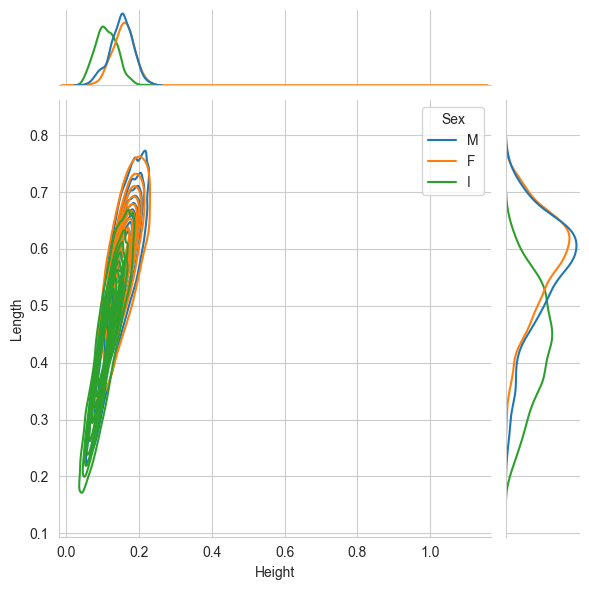

In [27]:
sns.jointplot(
    data=data,
    x="Height", y="Length", hue="Sex",
    kind="kde")
plt.show()

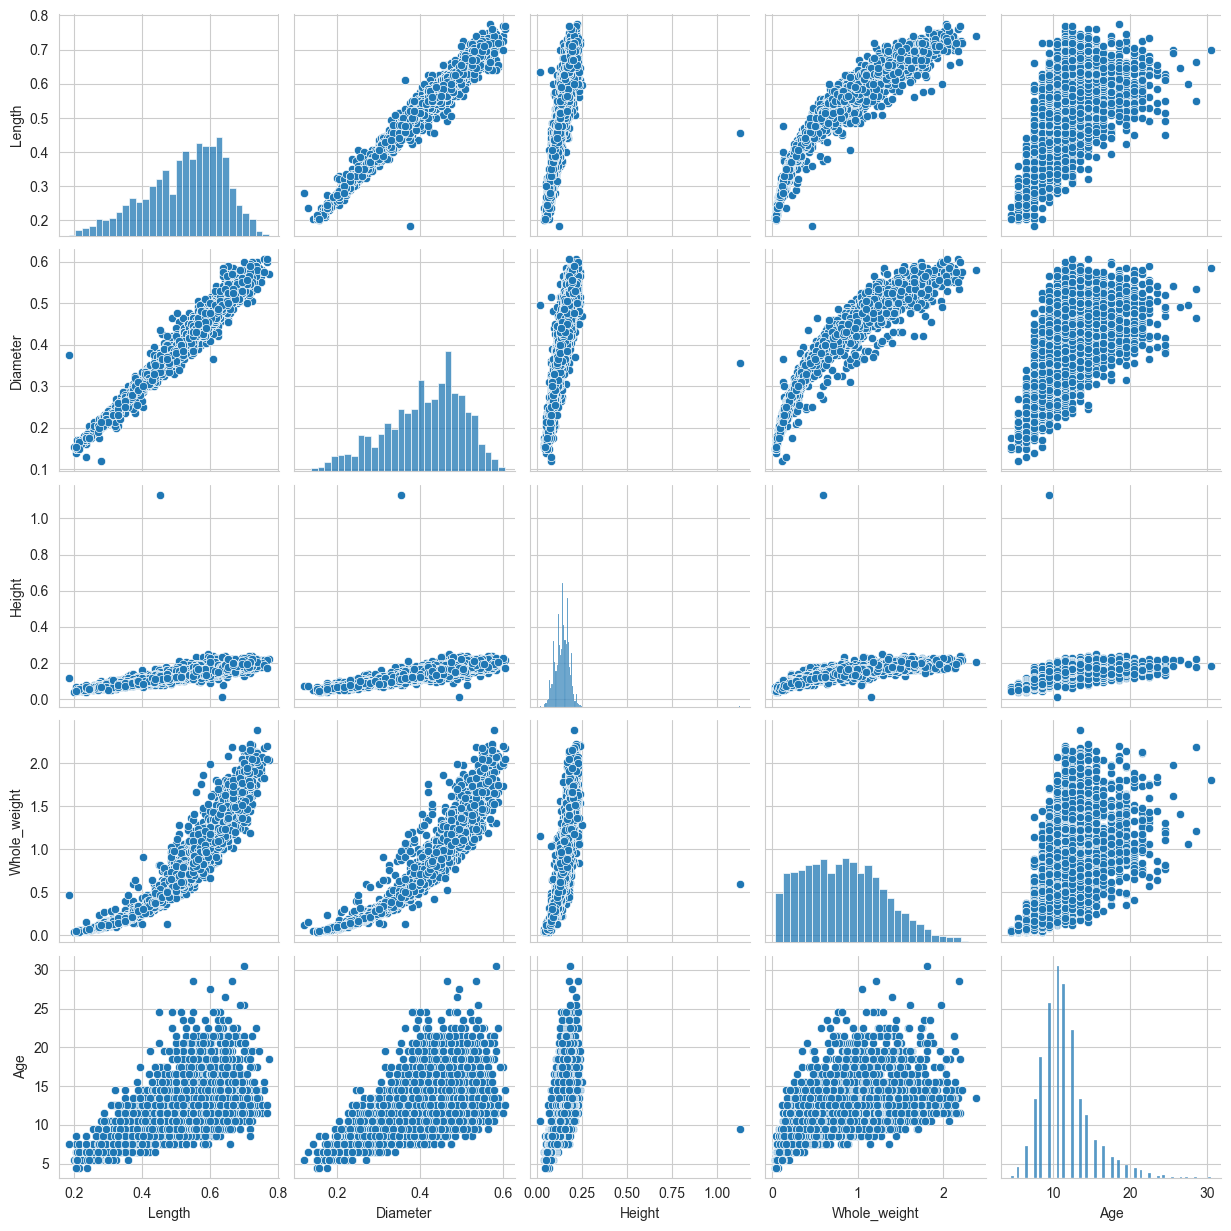

In [28]:
temp_data = data.loc[:,["Length", "Diameter", "Height", "Whole_weight", "Age"]]
sns.pairplot(temp_data)
plt.show()

## Preprocessing

In [29]:
# import libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# label encoder for Sex
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data

# create input and output
X = data.drop('Age', axis = 1)
y = data['Age']

In [30]:
standardScale = StandardScaler()
standardScale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (3276, 8)
y_train: (3276,)
X_test: (820, 8)
y_test: (820,)


## Model Selection

In [31]:
# import libraries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# make a function that include all regression models
def allRegressors(X_train, X_test, y_train, y_test):
    """
    This function use multiple machine learning regressors and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R Square for each regressors
    """
    
    # for Linear Regression
    print("*************************************************************************")
    lm_model = LinearRegression()
    lm_model.fit(X_train, y_train)
    lm_train_predictions = lm_model.predict(X_train)
    lm_test_predictions = lm_model.predict(X_test)
    print('Train MSE for Linear Regression:', mean_squared_error(y_train, lm_train_predictions))
    print('Test MSE for Linear Regression:', mean_squared_error(y_test, lm_test_predictions))
    print('Train RMSE for Linear Regression:', np.sqrt(mean_squared_error(y_train, lm_train_predictions)))
    print('Test RMSE for Linear Regression:', np.sqrt(mean_squared_error(y_test, lm_test_predictions)))
    print('Train MAE for Linear Regression:', mean_absolute_error(y_train, lm_train_predictions))
    print('Test MAE for Linear Regression:', mean_absolute_error(y_test, lm_test_predictions))
    print('Train R Square for Linear Regression:', r2_score(y_train, lm_train_predictions))
    print('Test R Square for Linear Regression:', r2_score(y_test, lm_test_predictions))
    
    
    # for Support Vector Machine Regressor
    print("*************************************************************************")
    svm_model = SVR()
    svm_model.fit(X_train, y_train)
    svm_train_predictions = svm_model.predict(X_train)
    svm_test_predictions = svm_model.predict(X_test)
    print('Train MSE for Support Vector Regression:', mean_squared_error(y_train, svm_train_predictions))
    print('Test MSE for Support Vector Regression:', mean_squared_error(y_test, svm_test_predictions))
    print('Train RMSE for Support Vector Regression:', np.sqrt(mean_squared_error(y_train, svm_train_predictions)))
    print('Test RMSE for Support Vector Regression:', np.sqrt(mean_squared_error(y_test, svm_test_predictions)))
    print('Train MAE for Support Vector Regression:', mean_absolute_error(y_train, svm_train_predictions))
    print('Test MAE for Support Vector Regression:', mean_absolute_error(y_test, svm_test_predictions))
    print('Train R Square for Support Vector Regression:', r2_score(y_train, svm_train_predictions))
    print('Test R Square for Support Vector Regression:', r2_score(y_test, svm_test_predictions))
    
    # for Random Forest Regression
    print("*************************************************************************")
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    rf_train_predictions = rf_model.predict(X_train)
    rf_test_predictions = rf_model.predict(X_test)
    print('Train MSE for Random Forest Regression:', mean_squared_error(y_train, rf_train_predictions))
    print('Test MSE for Random Forest Regression:', mean_squared_error(y_test, rf_test_predictions))
    print('Train RMSE for Random Forest Regression:', np.sqrt(mean_squared_error(y_train, rf_train_predictions)))
    print('Test RMSE for Random Forest Regression:', np.sqrt(mean_squared_error(y_test, rf_test_predictions)))
    print('Train MAE for Random Forest Regression:', mean_absolute_error(y_train, rf_train_predictions))
    print('Test MAE for Random Forest Regression:', mean_absolute_error(y_test, rf_test_predictions))
    print('Train R Square for Random Forest Regression:', r2_score(y_train, rf_train_predictions))
    print('Test R Square for Random Forest Regression:', r2_score(y_test, rf_test_predictions))
    
    # for Gradient Boosting Regression
    print("*************************************************************************")
    gb_model = GradientBoostingRegressor()
    gb_model.fit(X_train, y_train)
    gb_train_predictions = gb_model.predict(X_train)
    gb_test_predictions = gb_model.predict(X_test)
    print('Train MSE for Gradient Boosting Regression:', mean_squared_error(y_train, gb_train_predictions))
    print('Test MSE for Gradient Boosting Regression:', mean_squared_error(y_test, gb_test_predictions))
    print('Train RMSE for Gradient Boosting Regression:', np.sqrt(mean_squared_error(y_train, gb_train_predictions)))
    print('Test RMSE for Gradient Boosting Regression:', np.sqrt(mean_squared_error(y_test, gb_test_predictions)))
    print('Train MAE for Gradient Boosting Regression:', mean_absolute_error(y_train, gb_train_predictions))
    print('Test MAE for Gradient Boosting Regression:', mean_absolute_error(y_test, gb_test_predictions))
    print('Train R Square for Gradient Boosting Regression:', r2_score(y_train, gb_train_predictions))
    print('Test R Square for Gradient Boosting Regression:', r2_score(y_test, gb_test_predictions))
    
    # for KNeighbors Regression
    print("*************************************************************************")
    kn_model = KNeighborsRegressor()
    kn_model.fit(X_train, y_train)
    kn_train_predictions = kn_model.predict(X_train)
    kn_test_predictions = kn_model.predict(X_test)
    print('Train MSE for KNeighbors Regression:', mean_squared_error(y_train, kn_train_predictions))
    print('Test MSE for KNeighbors Regression:', mean_squared_error(y_test, kn_test_predictions))
    print('Train RMSE for KNeighbors Regression:', np.sqrt(mean_squared_error(y_train, kn_train_predictions)))
    print('Test RMSE for KNeighbors Regression:', np.sqrt(mean_squared_error(y_test, kn_test_predictions)))
    print('Train MAE for KNeighbors Regression:', mean_absolute_error(y_train, kn_train_predictions))
    print('Test MAE for KNeighbors Regression:', mean_absolute_error(y_test, kn_test_predictions))
    print('Train R Square for KNeighbors Regression:', r2_score(y_train, kn_train_predictions))
    print('Test R Square for KNeighbors Regression:', r2_score(y_test, kn_test_predictions))
    
    # for Decision Tree Regresion
    print("*************************************************************************")
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train, y_train)
    dt_train_predictions = dt_model.predict(X_train)
    dt_test_predictions = dt_model.predict(X_test)
    print('Train MSE for Decision Tree Regresion:', mean_squared_error(y_train, dt_train_predictions))
    print('Test MSE for Decision Tree Regresion:', mean_squared_error(y_test, dt_test_predictions))
    print('Train RMSE for Decision Tree Regresion:', np.sqrt(mean_squared_error(y_train, dt_train_predictions)))
    print('Test RMSE for Decision Tree Regresion:', np.sqrt(mean_squared_error(y_test, dt_test_predictions)))
    print('Train MAE for Decision Tree Regresion:', mean_absolute_error(y_train, dt_train_predictions))
    print('Test MAE for Decision Tree Regresion:', mean_absolute_error(y_test, dt_test_predictions))
    print('Train R Square for Decision Tree Regresion:', r2_score(y_train, dt_train_predictions))
    print('Test R Square for Decision Tree Regresion:', r2_score(y_test, dt_test_predictions))
    
    # for Ridge Regression
    print("*************************************************************************")
    rid_model = Ridge(alpha=.5)
    rid_model.fit(X_train, y_train)
    rid_train_predictions = rid_model.predict(X_train)
    rid_test_predictions = rid_model.predict(X_test)
    print('Train MSE for Ridge Regression:', mean_squared_error(y_train, rid_train_predictions))
    print('Test MSE for Ridge Regression:', mean_squared_error(y_test, rid_test_predictions))
    print('Train RMSE for Ridge Regression:', np.sqrt(mean_squared_error(y_train, rid_train_predictions)))
    print('Test RMSE for Ridge Regression:', np.sqrt(mean_squared_error(y_test, rid_test_predictions)))
    print('Train MAE for Ridge Regression:', mean_absolute_error(y_train, rid_train_predictions))
    print('Test MAE for Ridge Regression:', mean_absolute_error(y_test, rid_test_predictions))
    print('Train R Square for Ridge Regression:', r2_score(y_train, rid_train_predictions))
    print('Test R Square for Ridge Regression:', r2_score(y_test, rid_test_predictions))
    
    # Summary
    print("---------------------------Summary---------------------------")
    print("*************************************************************************")
    print('Test MAE for Linear Regression:', mean_absolute_error(y_test, lm_test_predictions))
    print('Test RMSE for Linear Regression:', np.sqrt(mean_squared_error(y_test, lm_test_predictions)))
    print('Test R Square for Linear Regression:', r2_score(y_test, lm_test_predictions))
    print("*************************************************************************")
    print('Test MAE for Support Vector Regression:', mean_absolute_error(y_test, svm_test_predictions))
    print('Test RMSE for Support Vector Regression:', np.sqrt(mean_squared_error(y_test, svm_test_predictions)))
    print('Test R Square for Support Vector Regression:', r2_score(y_test, svm_test_predictions))
    print("*************************************************************************")
    print('Test MAE for Random Forest Regression:', mean_absolute_error(y_test, rf_test_predictions))
    print('Test RMSE for Random Forest Regression:', np.sqrt(mean_squared_error(y_test, rf_test_predictions)))
    print('Test R Square for Random Forest Regression:', r2_score(y_test, rf_test_predictions))
    print("*************************************************************************")
    print('Test MAE for Gradient Boosting Regression:', mean_absolute_error(y_test, gb_test_predictions))
    print('Test RMSE for Gradient Boosting Regression:', np.sqrt(mean_squared_error(y_test, gb_test_predictions)))
    print('Test R Square for Gradient Boosting Regression:', r2_score(y_test, gb_test_predictions))
    print("*************************************************************************")
    print('Test MAE for KNeighbors Regression:', mean_absolute_error(y_test, kn_test_predictions))
    print('Test RMSE for KNeighbors Regression:', np.sqrt(mean_squared_error(y_test, kn_test_predictions)))
    print('Test R Square for KNeighbors Regression:', r2_score(y_test, kn_test_predictions))
    print("*************************************************************************")
    print('Test MAE for Decision Tree Regresion:', mean_absolute_error(y_test, dt_test_predictions))
    print('Test RMSE for Decision Tree Regresion:', np.sqrt(mean_squared_error(y_test, dt_test_predictions)))
    print('Test R Square for Decision Tree Regresion:', r2_score(y_test, dt_test_predictions))
    print("*************************************************************************")
    print('Test MAE for Ridge Regression:', mean_absolute_error(y_test, rid_test_predictions))
    print('Test RMSE for Ridge Regression:', np.sqrt(mean_squared_error(y_test, rid_test_predictions)))
    print('Test R Square for Ridge Regression:', r2_score(y_test, rid_test_predictions))
    print("*************************************************************************")

In [32]:
allRegressors(X_train, X_test, y_train, y_test)

*************************************************************************
Train MSE for Linear Regression: 4.922877493416862
Test MSE for Linear Regression: 4.930367614802381
Train RMSE for Linear Regression: 2.218755843579203
Test RMSE for Linear Regression: 2.2204431122643924
Train MAE for Linear Regression: 1.6092986512037057
Test MAE for Linear Regression: 1.6369902075396676
Train R Square for Linear Regression: 0.509787566498495
Test R Square for Linear Regression: 0.5139845142881385
*************************************************************************
Train MSE for Support Vector Regression: 5.276881441024486
Test MSE for Support Vector Regression: 5.399517338509846
Train RMSE for Support Vector Regression: 2.297146369090243
Test RMSE for Support Vector Regression: 2.3236861531863218
Train MAE for Support Vector Regression: 1.5388858515221924
Test MAE for Support Vector Regression: 1.581397164928287
Train R Square for Support Vector Regression: 0.47453640762689264
Test R Squa

# Choose the Best Model for Parameter Tuning

### Random Hyperparameter Grid 

In [33]:
# Random Hyperparameter Grid
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [35]:
# see best parameters
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [36]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 1.6640 degrees.
Accuracy = 85.80%.


In [37]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 1.5433 degrees.
Accuracy = 86.96%.


In [38]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.35%.


### Grid Search with Cross Validation

In [39]:
# Grid Search with Cross Validation
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [40]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [41]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 1.5259 degrees.
Accuracy = 87.10%.


In [42]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.51%.


## A Different Approache

In [43]:
np.random.seed(2)

n = len(data)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = data.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [44]:
y_train_orig = df_train.Age.values
y_val_orig = df_val.Age.values
y_test_orig = df_test.Age.values

y_train = np.log1p(df_train.Age.values)
y_val = np.log1p(df_val.Age.values)
y_test = np.log1p(df_test.Age.values)

del df_train['Age']
del df_val['Age']
del df_test['Age']

In [45]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [46]:
w_0, w = train_linear_regression(df_train, y_train)

In [47]:
y_pred = w_0 + df_train.dot(w)

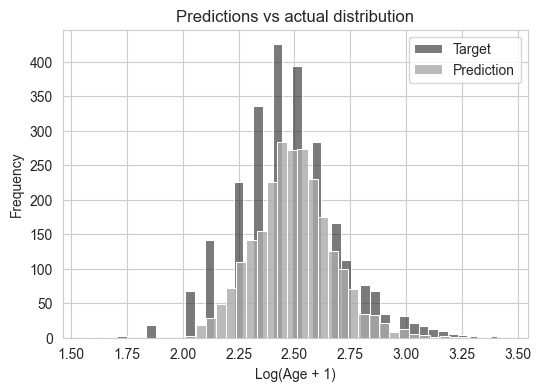

In [48]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='Target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='Prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Age + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [49]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [50]:
rmse(y_train, y_pred)

0.15850400427116798

In [51]:
y_pred = w_0 + df_val.dot(w)

In [52]:
rmse(y_val, y_pred)

0.18364436582587138

## Use the Data With No Anomaly 

In [53]:
datawithNoAnomaly

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [54]:
# create input and output
XnoAnomaly = datawithNoAnomaly.drop('Age', axis = 1)
ynoAnomaly = datawithNoAnomaly['Age']

standardScale = StandardScaler()
standardScale.fit_transform(XnoAnomaly)

X_trainnoAnomaly, X_testnoAnomaly, y_trainnoAnomaly, y_testnoAnomaly = train_test_split(XnoAnomaly, ynoAnomaly,
                                                                                        test_size = 0.20)

# see train and test dataset shape
print("X_train:", X_trainnoAnomaly.shape)
print("y_train:", y_trainnoAnomaly.shape)

print("X_test:", X_testnoAnomaly.shape)
print("y_test:", y_testnoAnomaly.shape)

X_train: (3276, 8)
y_train: (3276,)
X_test: (820, 8)
y_test: (820,)


In [55]:
allRegressors(X_trainnoAnomaly, X_testnoAnomaly, y_trainnoAnomaly, y_testnoAnomaly)

*************************************************************************
Train MSE for Linear Regression: 4.874111740335879
Test MSE for Linear Regression: 5.143705315430148
Train RMSE for Linear Regression: 2.2077390562147237
Test RMSE for Linear Regression: 2.2679738348204435
Train MAE for Linear Regression: 1.606115128269465
Test MAE for Linear Regression: 1.628334923783072
Train R Square for Linear Regression: 0.509191984396635
Test R Square for Linear Regression: 0.5137855786827565
*************************************************************************
Train MSE for Support Vector Regression: 5.216492420674687
Test MSE for Support Vector Regression: 5.958043877833455
Train RMSE for Support Vector Regression: 2.283964189884484
Test RMSE for Support Vector Regression: 2.44091046083904
Train MAE for Support Vector Regression: 1.5234329267620033
Test MAE for Support Vector Regression: 1.6511119089609847
Train R Square for Support Vector Regression: 0.47471530613188107
Test R Square